# Maestría en CIENCIAS DE DATOS Y BIG DATA V1E4
#### 09. MACHINE LEARNING: APRENDIZAJE SUPÉRVISADO
#### Docente: Msc. Renzo Claure Aracena.

### Suppor Vector Machines

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs 

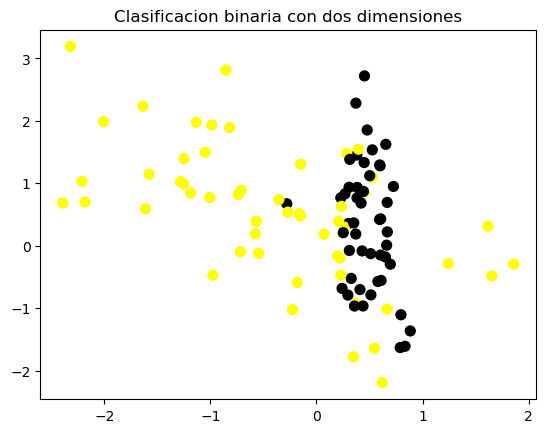

In [3]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Clasificacion binaria con dos dimensiones')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, flip_y = 0.1, class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

In [6]:
clas_svc = SVC(kernel='linear', C=1).fit(X_train, y_train)

print('Score SVC Entrenamiento: {:.3f}'.format(clas_svc.score(X_train, y_train)))
print('Score SVC Comprobacion: {:.3f}'.format(clas_svc.score(X_test, y_test)))


Score SVC Entrenamiento: 0.800
Score SVC Comprobacion: 0.760


In [7]:
for c_i in [0.00001, 0.001, 0.1, 1, 10, 1000]:
    clas_svc = SVC(kernel='linear', C=c_i).fit(X_train, y_train)
    print('C: {:.3f}'.format(c_i))
    print('Score SVC Entrenamiento: {:.3f}'.format(clas_svc.score(X_train, y_train)))
    print('Score SVC Comprobacion: {:.3f}'.format(clas_svc.score(X_test, y_test)))
    print('\n')

C: 0.000
Score SVC Entrenamiento: 0.507
Score SVC Comprobacion: 0.400


C: 0.001
Score SVC Entrenamiento: 0.507
Score SVC Comprobacion: 0.400


C: 0.100
Score SVC Entrenamiento: 0.773
Score SVC Comprobacion: 0.720


C: 1.000
Score SVC Entrenamiento: 0.800
Score SVC Comprobacion: 0.760


C: 10.000
Score SVC Entrenamiento: 0.800
Score SVC Comprobacion: 0.760


C: 1000.000
Score SVC Entrenamiento: 0.800
Score SVC Comprobacion: 0.760




### APLICANDO A LA BASE DE DATOS DE CANCER

In [ ]:
cancer = pd.read_csv('deep_learning/cancer.csv', delimiter = ";", decimal=",")
cancer.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cancer.csv'

In [ ]:
X = cancer.drop(['Tipo', 'ID'], axis=1)
y = cancer['Tipo']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
clas_svc = SVC(kernel = 'linear').fit(X_train, y_train)

In [ ]:
print('Score SVC Entrenamiento: {:.3f}'.format(clas_svc.score(X_train, y_train)))
print('Score SVC Comprobacion: {:.3f}'.format(clas_svc.score(X_test, y_test)))

In [ ]:
#Se puede llamar directamente a un separador lineal con LinearSVC
from sklearn.svm import LinearSVC

clas_svc = LinearSVC().fit(X_train, y_train)
clas_svc.score(X_test, y_test)
print('Score SVC Entrenamiento: {:.3f}'.format(clas_svc.score(X_train, y_train)))
print('Score SVC Comprobacion: {:.3f}'.format(clas_svc.score(X_test, y_test)))

### Con RBF

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

clas_svc = SVC(kernel = 'rbf').fit(X_train_scaler, y_train)
#clas_svc = LinearSVC().fit(X_train_scaler, y_train)
print('Score SVC Entrenamiento: {:.3f}'.format(clas_svc.score(X_train_scaler, y_train)))
print('Score SVC Comprobacion: {:.3f}'.format(clas_svc.score(X_test_scaler, y_test)))

### Con RBF Gamma y C

In [ ]:
# Agrupamientos complejos, clusters
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Clasificacion binaria mas comleja')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


In [ ]:
#pip install graphviz

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

*Realice un análisis de clasificación binaria sobre la base de vino tinto, reclasifique la categorías en dos, con la Calidad Nro 5 como 1 y el resto como 0*

Utilice SVC con rbf

pruebe:
1) gamma = 1, C=1

2) gamma = 0.1, C=2

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
base = pd.read_csv(url, delimiter = ';')
base['quality']

In [ ]:
base.shape

In [ ]:
base.head()


In [ ]:
base['quality'].value_counts()

In [ ]:
y = base[['quality']].replace({'quality':{5:1, 6:0,7:0,4:0,8:0,3:0}})
y = y['quality']


In [ ]:
y.value_counts()

In [ ]:
gamma = 1, C=1
gamma=0.1, C=2